<a href="https://colab.research.google.com/github/MirandaCR/Kodigo/blob/main/Regresi%C3%B3n%20Lineal/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerias**

In [83]:
import pandas as pd                                                               # Modulo para manipular datos
import numpy as np                                                                # Modulo para procesamiento
import matplotlib.pyplot as plt                                                   # Modulo de visualización
import seaborn as sns                                                             # Modulo de visualización
import missingno as msno                                                          # Modulo para valores faltantes
import statsmodels.api as sm                                                      # Modulo para modelos estadísticos
from sklearn.linear_model import LinearRegression                                 # Modulo para Regresión Lineal con ML
from sklearn.model_selection import train_test_split                              # Modulo para particionar la data
from sklearn.metrics import mean_squared_error                                    # Modulo de metricas para modelos

# **Carga de datos**

In [3]:
# Copiando la url del dataset en formato csv
url = 'https://raw.githubusercontent.com/MirandaCR/Kodigo/main/Regresi%C3%B3n%20Lineal/Datasets/advertising.csv'

# Lectura de datos
df_advertising = pd.read_csv(url)

#Visualización Inicial
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Analisis descriptivo**

1. Estadística Descriptiva
2. Valores Nulos
3. Correlaciones
4. Distribuciones
5. Valores Atípicos




## **1. Estadística Descriptiva**

In [6]:
# Determinando filas y columnas del dataset
print("Filas:" + str(df_advertising.shape[0]))
print("Columnas:" + str(df_advertising.shape[1]))

Filas:200
Columnas:4


In [7]:
# Estadísticas de variables numéricas
df_advertising.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


## **2. Valores Nulos**

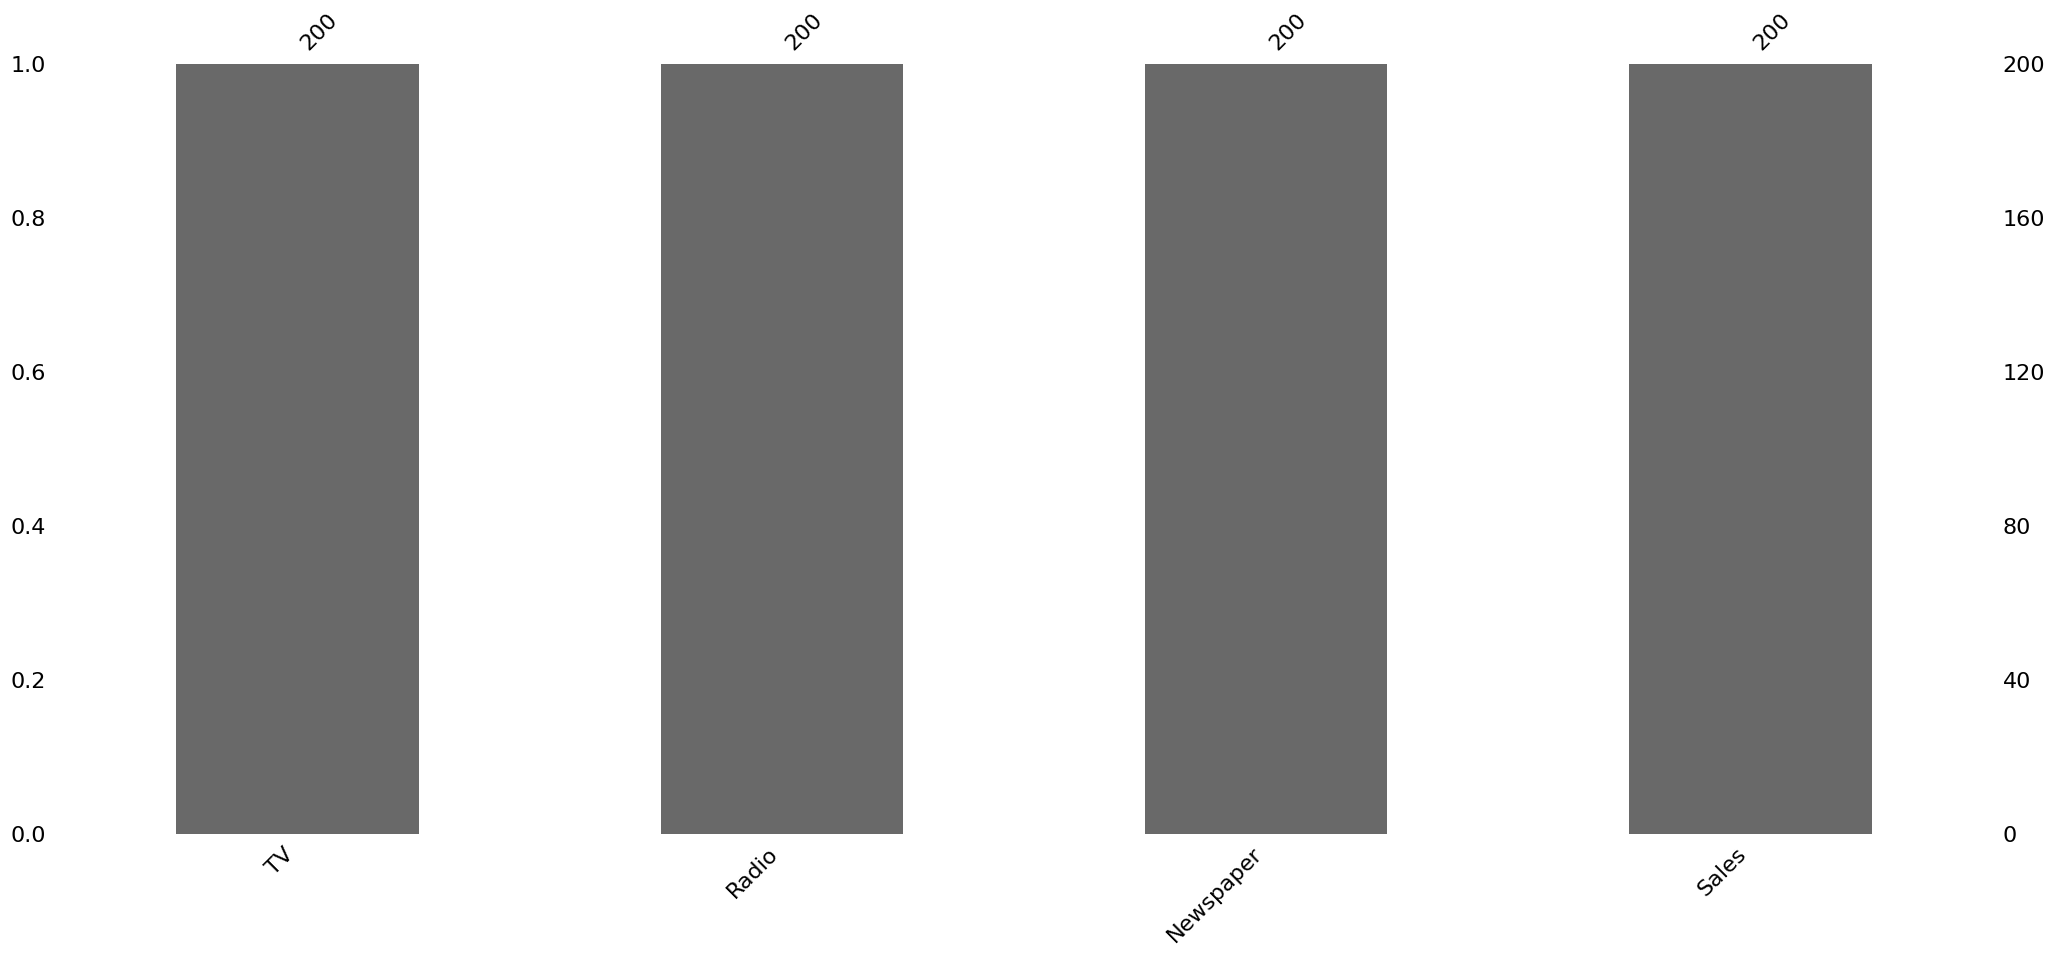

In [12]:
# Gráfico para identificar valores nulos por columna
msno.bar(df_advertising)
plt.show()

In [20]:
# Tabla con total de nulos
df_advertising.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## **3. Correlaciones**

In [31]:
# Estimando la matriz de correlación
corr = df_advertising.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


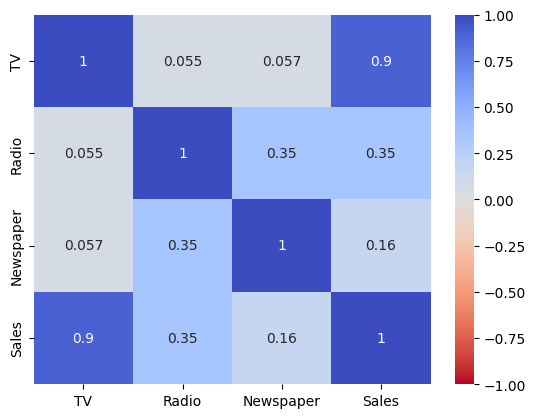

In [32]:
# Graficar
sns.heatmap(corr,annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
plt.show()

## **4. Distribuciones**

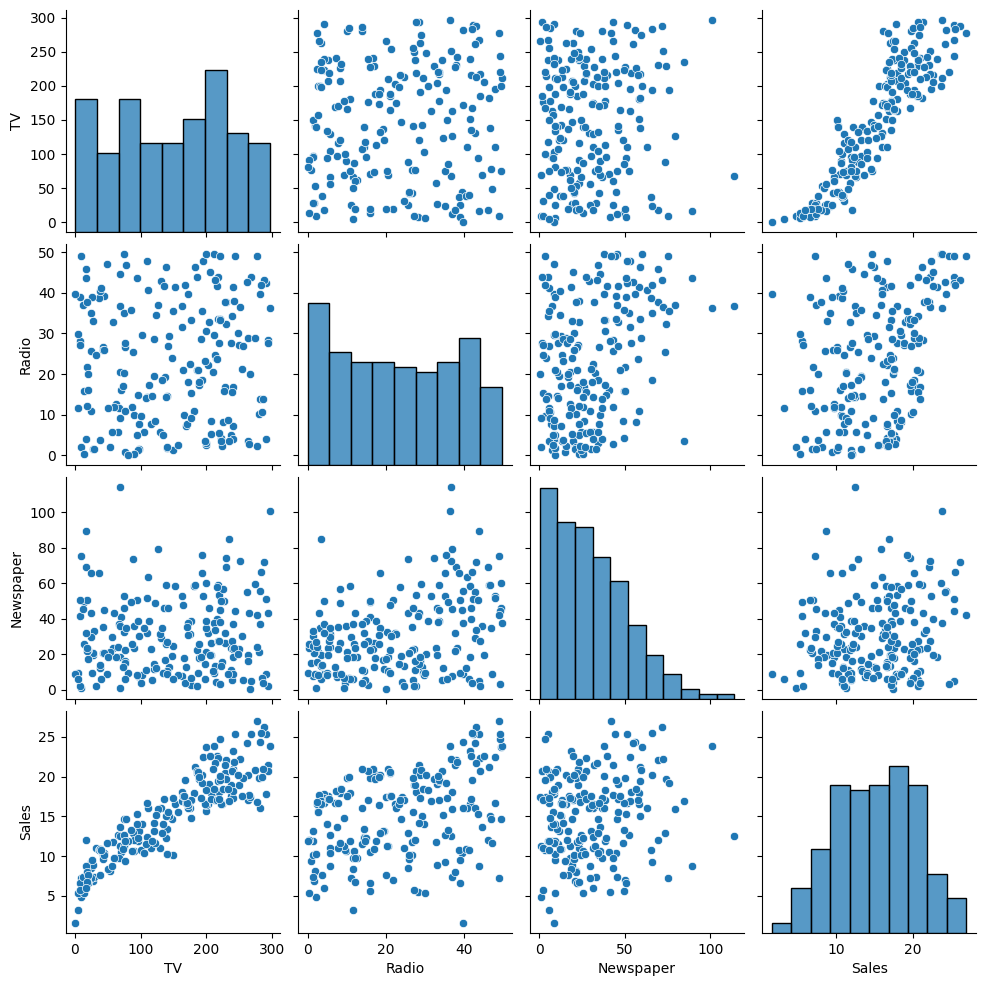

In [33]:
# Graficando distribuciones y relaciones entre variables
sns.pairplot(df_advertising)

## **5. Valores Atípicos**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


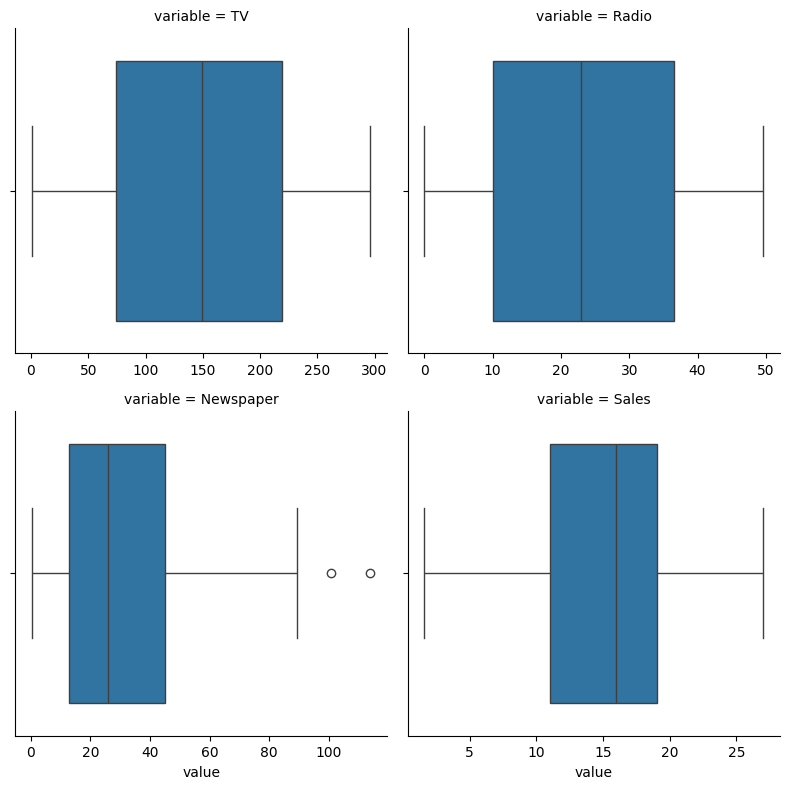

In [38]:
# Convertir el DataFrame a formato largo
df_long = df_advertising.melt(var_name='variable', value_name='value')

# Crear un FacetGrid con seaborn
g = sns.FacetGrid(df_long, col='variable', col_wrap=2, sharex=False, sharey=False, height=4, )

# Mapear el boxplot a cada subplot en el FacetGrid
g.map(sns.boxplot, 'value')

# Ajustar el layout para evitar superposición
plt.tight_layout()

# Mostrar la figura consolidada
plt.show()

# **Implementando la Regresión Lineal**

In [54]:
# Selección de Variables
Y = df_advertising["Sales"]
X = df_advertising["TV"]

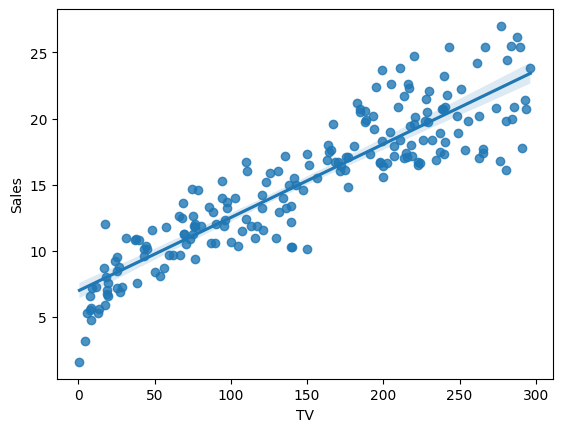

In [55]:
sns.regplot(x=X,y=Y)
plt.show()

In [65]:
# Corriendo el modelo
X = sm.add_constant(X)
lr_model = sm.OLS(Y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 26 May 2024   Prob (F-statistic):           7.93e-74
Time:                        18:20:07   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

## **Fórmula** de la Regresión Lineal

La fórmula de la regresión lineal basada en los resultados de OLS es:




$$
\begin{align}
\text{Sales} = 6.97 + 0.06 \cdot \text{TV}\
\end{align}
$$

Donde:
- `Sales` es la variable dependiente.
- `TV` es la variable independiente.
- El coeficiente de `TV` es 0.0909.

# **Regresión Lineal Mútiple**

In [77]:
X = df_advertising.iloc[:,:-1]
y = df_advertising.iloc[:,-1]

In [91]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [78]:
# División del conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Creación del modelo de regresión lineal
lr_model1 = LinearRegression()

# Entrenamiento del modelo
lr_model1.fit(X_train, y_train)

LinearRegression()

In [98]:
# Evaluación del modelo en el conjunto de test
R2 = lr_model1.score(X_train, y_train)
coeficientes = lr_model1.coef_
intercepto = lr_model1.intercept_

print("Coeficiente de determinación (R^2):", R2)
print("Intercepto: ", intercepto)
print("Coeficientes: ", coeficientes)

Coeficiente de determinación (R^2): 0.9159933497916115
Intercepto:  4.669247212392522
Coeficientes:  [0.05365017 0.11073062 0.00203697]


La fórmula de la regresión lineal ahora es:


$$
\begin{align}
\text{Sales} = 4.67 + 0.05 \cdot \text{TV}\ + 0.11 \cdot \text{Radio}\ + 0.002 \cdot \text{Newspaper}\
\end{align}
$$


## **Predicción**

In [93]:
y_pred = lr_model1.predict(X_test)  # Predict values for test set
MSE = mean_squared_error(y_test, y_pred)
print("Error medio cuadrático (MSE):", MSE)

# Interpretación
print(f"El valor del MSE indica el promedio de los cuadrados de las diferencias entre los valores observados y los valores predichos.")

Error medio cuadrático (MSE): 3.9380152204802865
El valor del MSE indica el promedio de los cuadrados de las diferencias entre los valores observados y los valores predichos.


In [97]:
# Ejemplo de Predicción
X_predecir = pd.DataFrame({'TV':[100,25,75],
                           'Radio':[75,100,25],
                           'Newspaper':[25,75,100]
                           })

lr_model1.predict(X_predecir)

array([18.38998474, 17.23633663, 11.6649726 ])

# **Referencias**

- [missingno](https://github.com/ResidentMario/missingno)
- [Seaborn](https://seaborn.pydata.org/)
- [Advertising Dataset - Kaggle](https://www.kaggle.com/datasets/ashydv/advertising-dataset)